# 优化与深度学习的关系

优化为深度学习提供了最小化损失函数的方法。但本质上，优化与深度学习的目标是__有区别__的。
* 优化的目标在于降低训练误差.
* 而深度学习的目标在于降低泛化误差.


优化的目标在于降低训练误差。 而深度学习的目标在于降低泛化误差。

# 优化在深度学习中的挑战

很多优化问题的并不存在解析解，而需要使用基于数值方法的优化算法来找到近似解，即数值解。  
即通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。
下面描述其中的两个挑战
* 局部最小值
* 鞍点

## 局部最小值

对于目标函数f(x)，如果f(x)在x1上的值比在x1邻近的其他点的值更小，那么f(x1)可能是一个局部最小值。  
如果f(x)在x2上的值是目标函数在整个定义域上的最小值，那么f(x2)是全局最小值。

example：

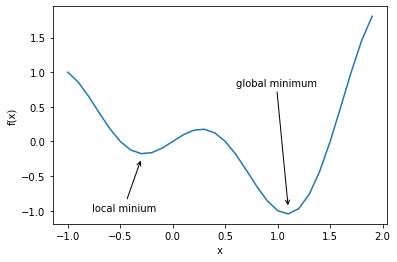

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x*np.cos(np.pi*x)

fig=plt.figure()
ax=fig.add_subplot(111)
x=np.arange(-1.0,2.0,0.1)
ax.plot(x,f(x))
ax.annotate('local minium',xy=(-0.3,-0.25),xytext=(-0.77, -1.0),arrowprops=dict(arrowstyle='->'))
ax.annotate('global minimum', xy=(1.1, -0.95), xytext=(0.6, 0.8),
                  arrowprops=dict(arrowstyle='->'))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## 鞍点

梯度接近或者变成0可能是由于当前解在局部最优解附近造成的。事实上，另外一种可能是当前解在鞍点（saddle point）附近

example：

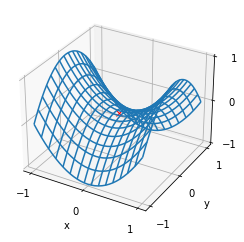

In [12]:
x, y = np.mgrid[-1: 1: 31j, -1: 1: 31j]
z=x**2 - y**2

ax=plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 2, 'cstride': 2})
ax.plot([0], [0], [0], 'rx')
ticks = [-1,  0, 1]
plt.xticks(ticks)
plt.yticks(ticks)
ax.set_zticks(ticks)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

在图的鞍点位置，目标函数在x轴方向上是局部最小值，但在y轴方向上是局部最大值。

假设一个函数的输入为k维向量，输出为标量，那么他的海森矩阵(hessian matrix)有k个特征值，该函数在梯度为0的位置上可能是局部最小值、局部最大值或者鞍点

* 当函数的海森矩阵在梯度为0的位置上的特征值全为正时，该函数得到局部最小值。
* 当函数的海森矩阵在梯度为0的位置上的特征值全为负时，该函数得到局部最大值。
* 当函数的海森矩阵在梯度为0的位置上的特征值有正有负时，该函数得到鞍点。

随机矩阵理论告诉我们，对于一个大的高斯随机矩阵来说，任一特征值是正或者是负的概率都是0.5。那么，以上第一种情况的概率为 0.5的k次方。由于深度学习模型参数通常都是高维的（k很大），__目标函数的鞍点通常比局部最小值更常见。__